In [1]:
# let's make a rolling boundry with a region between so we don't have a hyper observed region

In [2]:
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp
import time
import matplotlib.pylab as plt
%matplotlib inline
from rolling_slair import Target_map_modulo_basis_function
from lsst.sims.utils import hpid2RaDec, raDec2Hpid

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [13]:
nside = fs.set_default_nside(nside=32)
target_map = fs.standard_goals(nside=nside)
norm_factor = fs.calc_norm_factor(target_map)

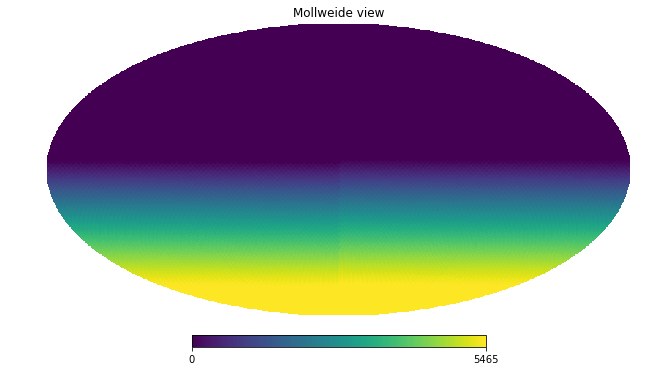

In [4]:
# Let's find the healpix that divides the WFD area in half
wfd = target_map['r'] * 0
wfd[np.where(target_map['r'] == 1)] = 1
wfd_accum = np.cumsum(wfd)
hp.mollview(wfd_accum)
split_indx = np.max(np.where(wfd_accum < wfd_accum.max()/2.))

In [5]:
ra,dec = hpid2RaDec(nside, split_indx)
dec

-23.317957065334241

In [6]:
ras, decs = hpid2RaDec(nside, np.arange(target_map['r'].size))

In [14]:
pad = 1.5  # degrees
north = np.where((target_map['r'] ==1) & (decs > (dec+pad)))
south = np.where((target_map['r'] ==1) & (decs < (dec-pad)))

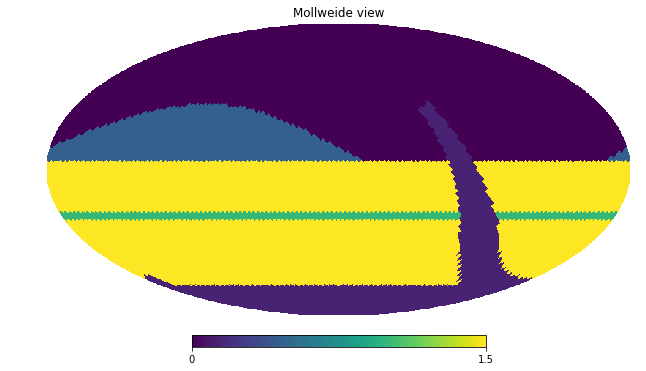

In [15]:
target_map['r'][north] = 1.5
target_map['r'][south] = 1.5
hp.mollview(target_map['r'])

In [9]:
north[0].size, south[0].size

(2669, 2676)